In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# loading the dataset
data = pd.read_csv("content/FuelConsumptionCo2.csv")

# 2. Cleaning up column names
data.rename(columns={
    'MODELYEAR': 'Year',
    'MAKE': 'Make',
    'MODEL': 'Model',
    'VEHICLECLASS': 'Class',
    'ENGINESIZE': 'Engine_Size',
    'CYLINDERS': 'Cylinders',
    'TRANSMISSION': 'Transmission',
    'FUELTYPE': 'Fuel_Type',
    'FUELCONSUMPTION_CITY': 'City_Cons',
    'FUELCONSUMPTION_HWY': 'Hwy_Cons',
    'FUELCONSUMPTION_COMB': 'Comb_Cons',
    'FUELCONSUMPTION_COMB_MPG': 'Mpg_Cons',
    'CO2EMISSIONS': 'CO2_Emissions'
}, inplace=True)

# showing the dataset structure
print(f"Dataset Shape: {data.shape}")
print("--- First 5 Rows ---")
print(data.head())

print("\n--- Data Types ---")
print(data.dtypes)

Dataset Shape: (1067, 13)
--- First 5 Rows ---
   Year   Make       Model        Class  Engine_Size  Cylinders Transmission  \
0  2014  ACURA         ILX      COMPACT          2.0          4          AS5   
1  2014  ACURA         ILX      COMPACT          2.4          4           M6   
2  2014  ACURA  ILX HYBRID      COMPACT          1.5          4          AV7   
3  2014  ACURA     MDX 4WD  SUV - SMALL          3.5          6          AS6   
4  2014  ACURA     RDX AWD  SUV - SMALL          3.5          6          AS6   

  Fuel_Type  City_Cons  Hwy_Cons  Comb_Cons  Mpg_Cons  CO2_Emissions  
0         Z        9.9       6.7        8.5        33            196  
1         Z       11.2       7.7        9.6        29            221  
2         Z        6.0       5.8        5.9        48            136  
3         Z       12.7       9.1       11.1        25            255  
4         Z       12.1       8.7       10.6        27            244  

--- Data Types ---
Year               int64
M

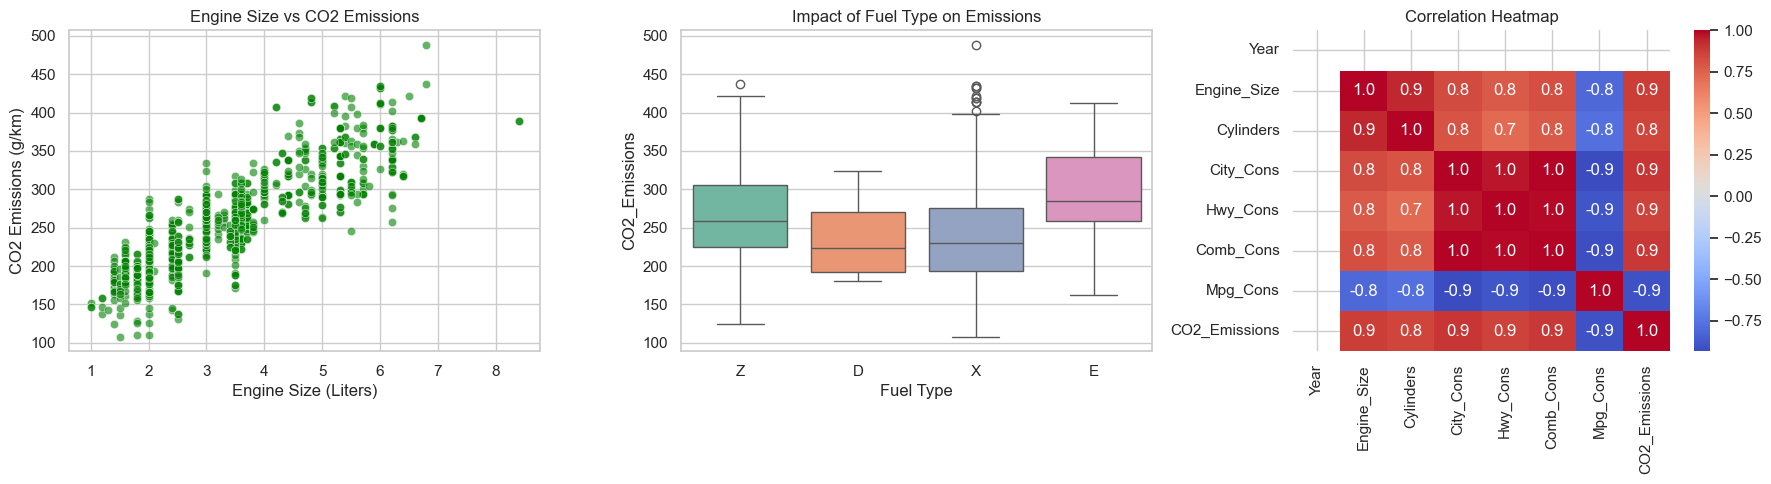

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Creating a figure with 3 subplots
plt.figure(figsize=(18, 5))

#  Scatter Plot (Engine Size vs CO2 Emissions)
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='Engine_Size', y='CO2_Emissions', color='green', alpha=0.6)
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('CO2 Emissions (g/km)')

# Box Plot (Fuel Type vs CO2 Emissions)
# Fuel Types: Z=Premium Gas, X=Regular Gas, D=Diesel, E=Ethanol
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Fuel_Type', y='CO2_Emissions',hue='Fuel_Type', palette='Set2', legend=False)
plt.title('Impact of Fuel Type on Emissions')
plt.xlabel('Fuel Type')

# Correlation Heatmap (Numerical variables only)
plt.subplot(1, 3, 3)
# Selecting only numerical columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting the Features we want to use
#I chose the ones with the highest correlation seen in the heatmap
features = ['Engine_Size', 'Cylinders', 'Comb_Cons', 'Fuel_Type']
target = 'CO2_Emissions'

# Created a new clean dataframe with just these columns
df_clean = data[features + [target]].copy()

# Converted Categorical Data to Numbers
# This turns 'Fuel_Type' (X, Z, D, E) into columns like 'Fuel_Type_X', 'Fuel_Type_Z'
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Separated Inputs (X) and Output (y)
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

# Splitted into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardized the Data (Mean=0, Std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Data Processing Complete ---")
print(f"Original Features: {features}")
print(f"New Encoded Feature Count: {X_train.shape[1]}")
print(f"Training Data Shape: {X_train_scaled.shape}")
print("\n--- Example of Scaled Data (First Row) ---")
print(X_train_scaled[0])

--- Data Processing Complete ---
Original Features: ['Engine_Size', 'Cylinders', 'Comb_Cons', 'Fuel_Type']
New Encoded Feature Count: 6
Training Data Shape: (853, 6)

--- Example of Scaled Data (First Row) ---
[-1.38536397 -0.99621998 -1.10334259 -0.30821029  1.04681569 -0.83416129]


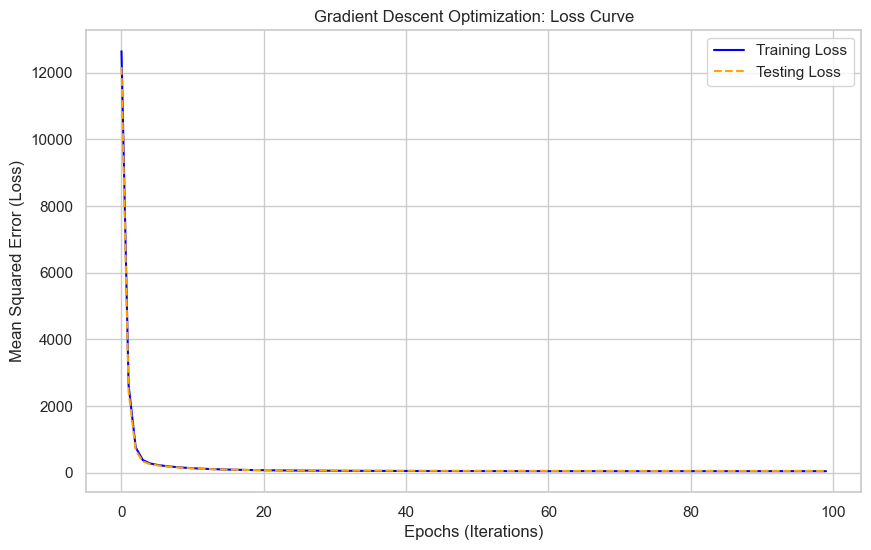

Final SGD Linear Loss: 49.29

--- Model Comparison Results ---
1. Linear Regression (SGD) | Loss: 49.29
2. Decision Tree           | Loss: 26.47 | R2: 0.9936
3. Random Forest           | Loss: 37.86 | R2: 0.9908

 WINNER: Decision Tree!
Files Saved.


In [5]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Optimization with Gradient Descent

# Setting up Stochastic Gradient Descent (SGD) Regressor
# learning_rate='constant' with eta0=0.001 ensures stable descent
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, 
                       learning_rate='constant', eta0=0.001, random_state=42)

train_losses = []
test_losses = []
epochs = 100

# The Training Loop (Manual Gradient Descent)
for epoch in range(epochs):
    # Take one step downhill
    sgd_reg.fit(X_train_scaled, y_train)
    
    # Record Train Error (Loss)
    y_train_pred = sgd_reg.predict(X_train_scaled)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_losses.append(train_loss)
    
    # Record Test Error (Loss) to check for overfitting
    y_test_pred = sgd_reg.predict(X_test_scaled)
    test_loss = mean_squared_error(y_test, y_test_pred)
    test_losses.append(test_loss)

# Plotting the Loss Curve 
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(test_losses, label='Testing Loss', color='orange', linestyle='--')
plt.xlabel('Epochs (Iterations)')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Gradient Descent Optimization: Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final SGD Linear Loss: {test_losses[-1]:.2f}")

# Model Competition 

# Training the other models for comparison
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

tree_reg.fit(X_train_scaled, y_train)
forest_reg.fit(X_train_scaled, y_train)

# Predicting
y_pred_tree = tree_reg.predict(X_test_scaled)
y_pred_forest = forest_reg.predict(X_test_scaled)

# Evaluating
loss_tree = mean_squared_error(y_test, y_pred_tree)
loss_forest = mean_squared_error(y_test, y_pred_forest)
score_tree = r2_score(y_test, y_pred_tree)
score_forest = r2_score(y_test, y_pred_forest)

print("\n--- Model Comparison Results ---")
print(f"1. Linear Regression (SGD) | Loss: {test_losses[-1]:.2f}")
print(f"2. Decision Tree           | Loss: {loss_tree:.2f} | R2: {score_tree:.4f}")
print(f"3. Random Forest           | Loss: {loss_forest:.2f} | R2: {score_forest:.4f}")

# We kept Decision Tree as winner if it's still the best
if loss_tree < test_losses[-1] and loss_tree < loss_forest:
    best_model = tree_reg
    print("\n WINNER: Decision Tree!")
elif loss_forest < loss_tree:
    best_model = forest_reg
    print("\n WINNER: Random Forest!")
else:
    best_model = sgd_reg
    print("\n WINNER: Linear Regression (SGD)!")

# Save files for API
joblib.dump(best_model, 'my_best_co2_model.pkl')
joblib.dump(scaler, 'my_scaler.pkl')
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Files Saved.")

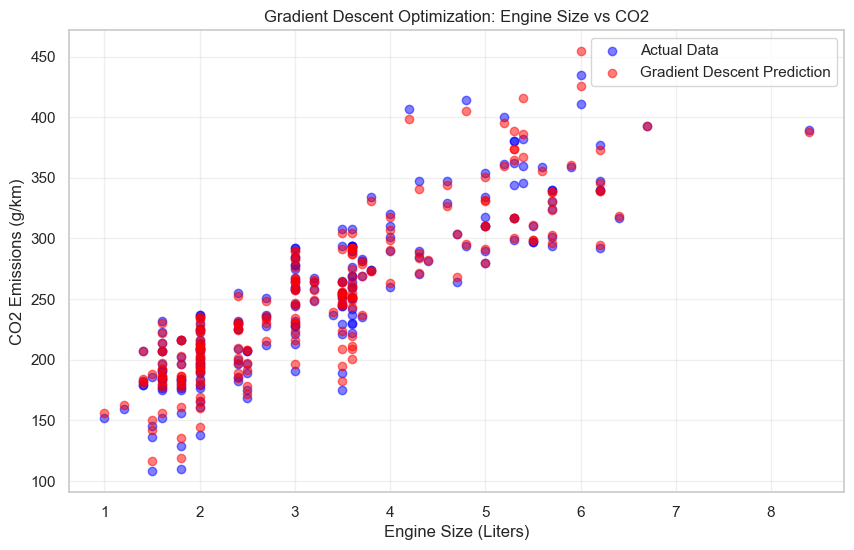

In [6]:
# VISUALIZING THE GRADIENT DESCENT MODEL 

# Generating predictions using the Gradient Descent model (sgd_reg)
# I used the scaled data for the model to understand it
y_pred_sgd = sgd_reg.predict(X_test_scaled)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting the Real Data (Blue Dots)
# I used the original 'Engine_Size' column for the X-axis so the numbers (1.0 - 8.0) make sense
plt.scatter(X_test['Engine_Size'], y_test, color='blue', alpha=0.5, label='Actual Data')

# Plotting the SGD Model's Prediction (Red Dots/Line)
plt.scatter(X_test['Engine_Size'], y_pred_sgd, color='red', alpha=0.5, label='Gradient Descent Prediction')

plt.title('Gradient Descent Optimization: Engine Size vs CO2')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()